In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau

/home/sfm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sfm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sfm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sfm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [18]:
path = os.getcwd()
print(path)

/media/sfm/62E4D583E4D559BD6/Users/Naji/Work/Academic/Pnemonia


In [20]:
total_images_train_normal = os.listdir( path + '/chest-xray-pneumonia/chest_xray/train/NORMAL')
print(total_images_train_normal)

['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg', 'IM-0127-0001.jpeg', 'IM-0128-0001.jpeg', 'IM-0129-0001.jpeg', 'IM-0131-0001.jpeg', 'IM-0133-0001.jpeg', 'IM-0135-0001.jpeg', 'IM-0137-0001.jpeg', 'IM-0140-0001.jpeg', 'IM-0141-0001.jpeg', 'IM-0143-0001.jpeg', 'IM-0145-0001.jpeg', 'IM-0149-0001.jpeg', 'IM-0151-0001.jpeg', 'IM-0152-0001.jpeg', 'IM-0154-0001.jpeg', 'IM-0156-0001.jpeg', 'IM-0158-0001.jpeg', 'IM-0160-0001.jpeg', 'IM-0162-0001.jpeg', 'IM-0164-0001.jpeg', 'IM-0166-0001.jpeg', 'IM-0168-0001.jpeg', 'IM-0170-0001.jpeg', 'IM-0172-0001.jpeg', 'IM-0176-0001.jpeg', 'IM-0177-0001.jpeg', 'IM-0178-0001.jpeg', 'IM-0182-0001.jpeg', 'IM-0183-0001.jpeg', 'IM-0185-0001.jpeg', 'IM-0187-0001.jpeg', 'IM-0189-0001.jpeg', 'IM-0191-0001.jpeg', 'IM-0193-0001.jpeg', 'IM-0195-0001.jpeg', 'IM-0199-0001.jpeg', 'IM-0201-0001.jpeg', 'IM-0203-0001.jpeg', 'IM-0205-0001.jpeg', 'IM-0206-0001.jpeg', 'IM-0207-0001.jpeg', 'IM-0209-0001.jpeg', 'IM-0210-000

In [21]:
total_images_train_pneumonia =  os.listdir( path + '/PNEUMONIA')
print(total_images_train_pneumonia)

['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg', 'person1003_virus_1685.jpeg', 'person1004_bacteria_2935.jpeg', 'person1004_virus_1686.jpeg', 'person1005_bacteria_2936.jpeg', 'person1005_virus_1688.jpeg', 'person1006_bacteria_2937.jpeg', 'person1007_bacteria_2938.jpeg', 'person1007_virus_1690.jpeg', 'person1008_bacteria_2939.jpeg', 'person1009_virus_1694.jpeg', 'person100_virus_184.jpeg', 'person1010_bacteria_2941.jpeg', 'person1010_virus_1695.jpeg', 'person1011_bacteria_2942.jpeg', 'person1012_bacteria_2943.jpeg', 'person1014_bacteria_2945.jpeg', 'person1015_virus_1701.jpeg', 'person1015_virus_1702.jpeg', 'person1016_bacteria_2947.jpeg', 'person1016_virus_1704.jpeg', 'person1017_bacteria_2948.jpeg', 'person1018_bacteria_2949.jpeg', 'person1018_virus_1706.jpeg', 'person1019_virus_1707.jpeg', 'person1019_virus_1708.jpeg', 'person101_virus_187.jpeg', 'person101_virus_188.jpeg

chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0518-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0251-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0914-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0993-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0988-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0679-0001.jpeg


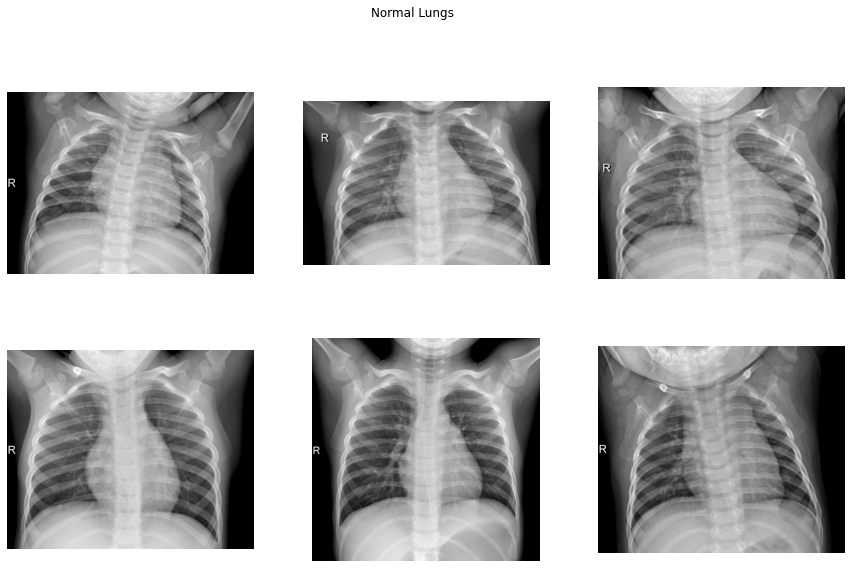

In [33]:
sample_normal = random.sample(total_images_train_normal,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    subpath = 'chest-xray-pneumonia/chest_xray/train/NORMAL/'+sample_normal[i]
    print(subpath)
    im = cv2.imread(subpath)
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Normal Lungs')
plt.show()

chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person315_bacteria_1466.jpeg
chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person741_bacteria_2644.jpeg
chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person378_virus_761.jpeg
chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person509_virus_1024.jpeg
chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1254_virus_2130.jpeg
chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1433_virus_2447.jpeg


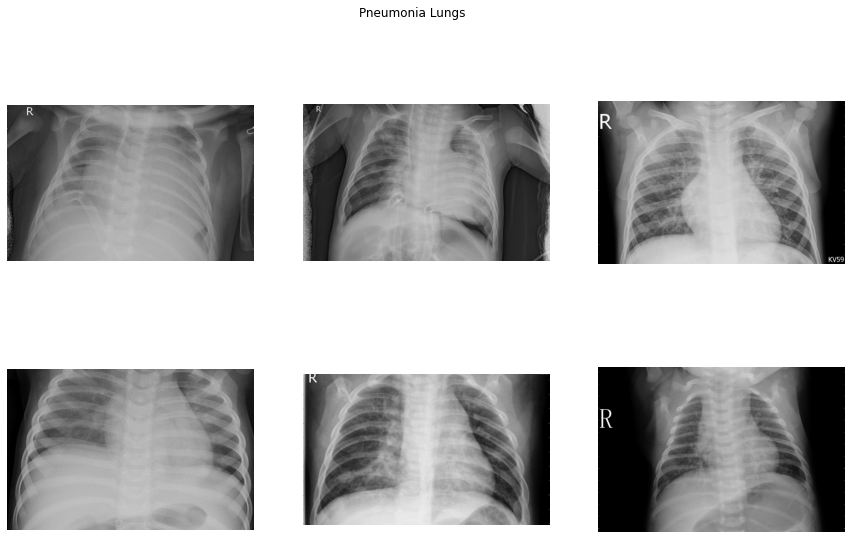

In [37]:
sample_pneumonia = random.sample(total_images_train_pneumonia,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    subpath = 'chest-xray-pneumonia/chest_xray/train/PNEUMONIA/'+sample_pneumonia[i]
    print(subpath)
    im = cv2.imread(subpath)
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Pneumonia Lungs')
plt.show()

NUMBER OF DIFFERENCE VISUALIZE

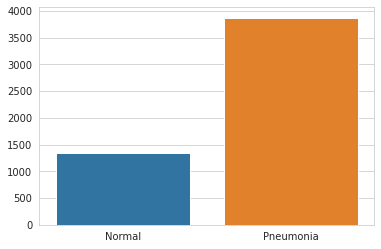

In [38]:
sns.set_style('whitegrid')
sns.barplot(x=['Normal','Pneumonia'],y=[len(total_images_train_normal),len(total_images_train_pneumonia)])

In [39]:
image_height = 150
image_width = 150
batch_size = 10
no_of_epochs  = 20

In [40]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(image_height,image_width,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0

In [ ]:
#Data augmentation

In [49]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)


In [50]:
training_set = train_datagen.flow_from_directory( path + '/chest-xray-pneumonia/chest_xray/train',target_size=(image_width, image_height),batch_size=batch_size,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [51]:
test_set = test_datagen.flow_from_directory(path + '/chest-xray-pneumonia/chest_xray/test',target_size=(image_width, image_height),batch_size=batch_size,class_mode='binary')

Found 624 images belonging to 2 classes.


In [52]:
validation_set = validation_datagen.flow_from_directory(path+ '/chest-xray-pneumonia/chest_xray/val', target_size=(image_width, image_height),batch_size=batch_size,class_mode='binary')
    

Found 16 images belonging to 2 classes.


In [53]:
#Reduce learning rate when a metric has stopped improving.
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

In [54]:
callbacks = [reduce_learning_rate]

In [55]:

history = model.fit_generator(training_set,
                    steps_per_epoch=5216//batch_size,
                    epochs=no_of_epochs,
                    validation_data=validation_set,
                    validation_steps=16//batch_size,
                    callbacks=callbacks
                   )

Epoch 1/20
521/521 [==============================] - 470s 903ms/step - loss: 0.4582 - acc: 0.8010 - val_loss: 0.8203 - val_acc: 0.6000
Epoch 2/20
521/521 [==============================] - 455s 874ms/step - loss: 0.3021 - acc: 0.8705 - val_loss: 0.8995 - val_acc: 0.6000
Epoch 3/20
521/521 [==============================] - 478s 917ms/step - loss: 0.2539 - acc: 0.8986 - val_loss: 0.7498 - val_acc: 0.6000
Epoch 4/20
521/521 [==============================] - 441s 846ms/step - loss: 0.2193 - acc: 0.9128 - val_loss: 1.0214 - val_acc: 0.5000
Epoch 5/20
521/521 [==============================] - 456s 875ms/step - loss: 0.2118 - acc: 0.9193 - val_loss: 1.0318 - val_acc: 0.5000
Epoch 6/20
521/521 [==============================] - 488s 937ms/step - loss: 0.1901 - acc: 0.9284 - val_loss: 1.3783 - val_acc: 0.6000
Epoch 7/20
521/521 [==============================] - 501s 962ms/step - loss: 0.1892 - acc: 0.9272 - val_loss: 1.0294 - val_acc: 0.6000
Epoch 8/20
521/521 [============================